# LIBRARY DECLARATIONS

In [25]:
import pandas as pd
#import sqlalchemy 
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
#from prettytable import PrettyTable
import random
from matplotlib.text import Annotation
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D

# CLASS AND FUNCTIONS

In [26]:
class Annotation3D(Annotation):
    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0,0), *args, **kwargs)
        self._xyz = xyz

    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, renderer.M)
        self.xy=(x2,y2)
        super().draw(renderer)
        
def _annotate3D(ax,text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''

    annotation= Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)

setattr(Axes3D,'annotate3D',_annotate3D)

# DATA IMPORT (CREATED VIA SCRIPTS Dataset_GTE.ipynb)

In [27]:
Loan_NN1= pd.read_csv("loan/Results_Loan_NN1_GTE.csv")
Loan_NN2 = pd.read_csv("loan/Results_Loan_NN2_GTE.csv")
Loan5_NN1 = pd.read_csv("loan/Result_Loan5_NN1_GTE.csv")
Loan50_NN1 = pd.read_csv("loan/Result_Loan50_NN1_GTE.csv")
Time_NN1 = pd.read_csv("time/Result_Time_NN1_GTE.csv")
Time_NN2 = pd.read_csv("time/Result_Time_NN2_GTE.csv")
f = open("loan/Loan_Data.txt", "r")
Loan_Data = [t.strip('   \n').split(" ") for t in f.readlines()]
Loan_Data_features = []
Loan_Data_labels = []
for x in Loan_Data:
    Loan_Data_features.append([int(x[1]), int(x[2]), int(x[3])])
    Loan_Data_labels.append([int(x[4])])

In [28]:
Loan_NN1.head()

,instance,distance_mean,distance_std,cosine_mean,cosine_std,first_correct_percentage,second_correct_percentage,all_correct_percentage
0,0,0.799107,0.125445,1.826964,0.183390,47,43,22
1,1,0.790960,0.125851,1.773757,0.216741,55,38,24
2,2,0.645444,0.118059,1.488289,0.333484,10,28,3
3,3,0.646125,0.086867,1.140744,0.265777,13,48,6
4,4,0.730174,0.088213,1.857096,0.104300,50,32,28


In [29]:
Loan5_NN1.head()

,instance_mean,distance_mean,distance_std,cosine_mean,cosine_std,first_correct%,second_correct%,all_correct%
0,0,0.642718,0.117952,1.656672,0.318171,45,40,32
1,1,0.556003,0.152873,1.245884,0.469991,58,30,16
2,2,0.347987,0.123072,NaN,NaN,50,45,36
3,3,0.375125,0.090567,NaN,NaN,48,33,25
4,4,0.629700,0.121467,1.681087,0.317868,34,26,22


# NORMALIZING ED, MAKING MEASURES OF ORDER BY 100, AND CREATING C OF ED "'distance_mean_diff'" 

In [30]:
Loan_NN1_normalized = Loan_NN1.copy()
#Loan_NN1_normalized['cosine_mean_normalized'] = Loan_NN1['cosine_mean']/2
#Loan_NN1_normalized['cosine_std_normalized'] = Loan_NN1['cosine_std']/2
Loan_NN1_normalized['first_correct_percentage_normalized'] = Loan_NN1['first_correct_percentage']/100
Loan_NN1_normalized['second_correct_percentage_normalized'] = Loan_NN1['second_correct_percentage']/100
Loan_NN1_normalized['all_correct_percentage_normalized'] = Loan_NN1['all_correct_percentage']/100
Loan_NN1_normalized['distance_std_normalized'] = (Loan_NN1_normalized['distance_std']-min(Loan_NN1_normalized['distance_std']))/(max(Loan_NN1_normalized['distance_std'])-min(Loan_NN1_normalized['distance_std']))
Loan_NN1_normalized['distance_mean_diff'] = 1 - Loan_NN1_normalized['distance_mean']

In [31]:
Loan_NN2_normalized = Loan_NN2.copy()
#Loan_NN2_normalized['cosine_mean_normalized'] = Loan_NN2['cosine_mean']/2
#Loan_NN2_normalized['cosine_std_normalized'] = Loan_NN2['cosine_std']/2
Loan_NN2_normalized['first_correct_percentage_normalized'] = Loan_NN2['first_correct_percentage']/100
Loan_NN2_normalized['second_correct_percentage_normalized'] = Loan_NN2['second_correct_percentage']/100
Loan_NN2_normalized['all_correct_percentage_normalized'] = Loan_NN2['all_correct_percentage']/100
Loan_NN2_normalized['distance_std_normalized'] = (Loan_NN2_normalized['distance_std']-min(Loan_NN2_normalized['distance_std']))/(max(Loan_NN2_normalized['distance_std'])-min(Loan_NN2_normalized['distance_std']))
Loan_NN2_normalized['distance_mean_diff'] = 1 - Loan_NN2_normalized['distance_mean']

In [32]:
Loan5_NN1_normalized = Loan5_NN1.copy()
#Loan5_NN1_normalized['cosine_mean_normalized'] = Loan5_NN1['cosine_mean']/2
#Loan5_NN1_normalized['cosine_std_normalized'] = Loan5_NN1['cosine_std']/2
Loan5_NN1_normalized['first_correct_percentage_normalized'] = Loan5_NN1['first_correct%']/100
Loan5_NN1_normalized['second_correct_percentage_normalized'] = Loan5_NN1['second_correct%']/100
Loan5_NN1_normalized['all_correct_percentage_normalized'] = Loan5_NN1['all_correct%']/100
Loan5_NN1_normalized['distance_std_normalized'] = (Loan5_NN1_normalized['distance_std']-min(Loan5_NN1_normalized['distance_std']))/(max(Loan5_NN1_normalized['distance_std'])-min(Loan5_NN1_normalized['distance_std']))
Loan5_NN1_normalized['distance_mean_diff'] = 1 - Loan5_NN1_normalized['distance_mean']

In [33]:
Loan50_NN1_normalized = Loan50_NN1.copy()
#Loan50_NN1_normalized['cosine_mean_normalized'] = Loan50_NN1['cosine_mean']/2
#Loan50_NN1_normalized['cosine_std_normalized'] = Loan50_NN1['cosine_std']/2
Loan50_NN1_normalized['first_correct_percentage_normalized'] = Loan50_NN1['first_correct%']/100
Loan50_NN1_normalized['second_correct_percentage_normalized'] = Loan50_NN1['second_correct%']/100
Loan50_NN1_normalized['all_correct_percentage_normalized'] = Loan50_NN1['all_correct%']/100
Loan50_NN1_normalized['distance_std_normalized'] = (Loan50_NN1_normalized['distance_std']-min(Loan50_NN1_normalized['distance_std']))/(max(Loan50_NN1_normalized['distance_std'])-min(Loan50_NN1_normalized['distance_std']))
Loan50_NN1_normalized['distance_mean_diff'] = 1 - Loan50_NN1_normalized['distance_mean']

In [34]:
Time_NN1_normalized = Time_NN1.copy()
#Time_NN1_normalized['cosine_mean_normalized'] = Time_NN1['cosine_mean']/2
#Time_NN1_normalized['cosine_std_normalized'] = Time_NN1['cosine_std']/2

Time_NN1_normalized['distance_mean_normalized'] = (Time_NN1['distance_mean']-min(Time_NN1['distance_mean']))/(max(Time_NN1['distance_mean'])-min(Time_NN1['distance_mean']))
Time_NN1_normalized['distance_std_normalized'] = (Time_NN1['distance_std']-min(Time_NN1['distance_std']))/(max(Time_NN1['distance_std'])-min(Time_NN1['distance_std']))

Time_NN1_normalized['first_correct_percentage_normalized'] = Time_NN1['first_correct%']/100
Time_NN1_normalized['second_correct_percentage_normalized'] = Time_NN1['second_correct%']/100
Time_NN1_normalized['all_correct_percentage_normalized'] = Time_NN1['all_correct%']/100

Time_NN1_normalized['distance_std_normalized'] = (Time_NN1_normalized['distance_std']-min(Time_NN1_normalized['distance_std']))/(max(Time_NN1_normalized['distance_std'])-min(Time_NN1_normalized['distance_std']))
Time_NN1_normalized['distance_mean_diff'] = 1 - Time_NN1_normalized['distance_mean_normalized']

In [35]:
Time_NN2_normalized = Time_NN2.copy()
#Time_NN2_normalized['cosine_mean_normalized'] = Time_NN2['cosine_mean']/2
#Time_NN2_normalized['cosine_std_normalized'] = Time_NN2['cosine_std']/2

Time_NN2_normalized['distance_mean_normalized'] = (Time_NN2['distance_mean']-min(Time_NN2['distance_mean']))/(max(Time_NN2['distance_mean'])-min(Time_NN2['distance_mean']))
Time_NN2_normalized['distance_std_normalized'] = (Time_NN2['distance_std']-min(Time_NN2['distance_std']))/(max(Time_NN2['distance_std'])-min(Time_NN2['distance_std']))

Time_NN2_normalized['first_correct_percentage_normalized'] = Time_NN2['first_correct%']/100
Time_NN2_normalized['second_correct_percentage_normalized'] = Time_NN2['second_correct%']/100
Time_NN2_normalized['all_correct_percentage_normalized'] = Time_NN2['all_correct%']/100
Time_NN2_normalized['distance_std_normalized'] = (Time_NN2_normalized['distance_std']-min(Time_NN2_normalized['distance_std']))/(max(Time_NN2_normalized['distance_std'])-min(Time_NN2_normalized['distance_std']))
Time_NN2_normalized['distance_mean_diff'] = 1 - Time_NN2_normalized['distance_mean_normalized']

In [36]:
Loan_NN1_normalized.head()

,instance,distance_mean,distance_std,cosine_mean,cosine_std,first_correct_percentage,second_correct_percentage,all_correct_percentage,first_correct_percentage_normalized,second_correct_percentage_normalized,all_correct_percentage_normalized,distance_std_normalized,distance_mean_diff
0,0,0.799107,0.125445,1.826964,0.183390,47,43,22,0.47,0.43,0.22,0.649720,0.200893
1,1,0.790960,0.125851,1.773757,0.216741,55,38,24,0.55,0.38,0.24,0.656039,0.209040
2,2,0.645444,0.118059,1.488289,0.333484,10,28,3,0.10,0.28,0.03,0.534715,0.354556
3,3,0.646125,0.086867,1.140744,0.265777,13,48,6,0.13,0.48,0.06,0.048985,0.353875
4,4,0.730174,0.088213,1.857096,0.104300,50,32,28,0.50,0.32,0.28,0.069957,0.269826


In [37]:
Loan_NN2.head()

,instance,cosine_mean,cosine_std,distance_mean,distance_std,first_correct_percentage,second_correct_percentage,all_correct_percentage
0,0,1.835079,0.161067,0.801797,0.124691,46,40,21
1,1,1.771558,0.162434,0.785036,0.118267,53,28,15
2,2,1.505587,0.330301,0.653239,0.132842,8,38,5
3,3,1.181715,0.274992,0.632892,0.097302,13,38,6
4,4,1.854729,0.126328,0.722247,0.113873,39,27,22


# COMBINING RESULTS FOR LOAN 25 NN1 & NN2

In [38]:
merge=pd.merge(Loan_NN1, Loan_NN2, on="instance",suffixes=("-NN1","-NN2"))
merge.head()

,instance,distance_mean-NN1,distance_std-NN1,cosine_mean-NN1,cosine_std-NN1,first_correct_percentage-NN1,second_correct_percentage-NN1,all_correct_percentage-NN1,cosine_mean-NN2,cosine_std-NN2,distance_mean-NN2,distance_std-NN2,first_correct_percentage-NN2,second_correct_percentage-NN2,all_correct_percentage-NN2
0,0,0.799107,0.125445,1.826964,0.183390,47,43,22,1.835079,0.161067,0.801797,0.124691,46,40,21
1,1,0.790960,0.125851,1.773757,0.216741,55,38,24,1.771558,0.162434,0.785036,0.118267,53,28,15
2,2,0.645444,0.118059,1.488289,0.333484,10,28,3,1.505587,0.330301,0.653239,0.132842,8,38,5
3,3,0.646125,0.086867,1.140744,0.265777,13,48,6,1.181715,0.274992,0.632892,0.097302,13,38,6
4,4,0.730174,0.088213,1.857096,0.104300,50,32,28,1.854729,0.126328,0.722247,0.113873,39,27,22


In [39]:
merge_normalized=pd.merge(Loan_NN1_normalized, Loan_NN2_normalized, on="instance",suffixes=("-NN1","-NN2"))
merge_normalized.head()

,instance,distance_mean-NN1,distance_std-NN1,cosine_mean-NN1,cosine_std-NN1,first_correct_percentage-NN1,second_correct_percentage-NN1,all_correct_percentage-NN1,first_correct_percentage_normalized-NN1,second_correct_percentage_normalized-NN1,...,distance_mean-NN2,distance_std-NN2,first_correct_percentage-NN2,second_correct_percentage-NN2,all_correct_percentage-NN2,first_correct_percentage_normalized-NN2,second_correct_percentage_normalized-NN2,all_correct_percentage_normalized-NN2,distance_std_normalized-NN2,distance_mean_diff-NN2
0,0,0.799107,0.125445,1.826964,0.183390,47,43,22,0.47,0.43,...,0.801797,0.124691,46,40,21,0.46,0.40,0.21,0.571250,0.198203
1,1,0.790960,0.125851,1.773757,0.216741,55,38,24,0.55,0.38,...,0.785036,0.118267,53,28,15,0.53,0.28,0.15,0.505081,0.214964
2,2,0.645444,0.118059,1.488289,0.333484,10,28,3,0.10,0.28,...,0.653239,0.132842,8,38,5,0.08,0.38,0.05,0.655223,0.346761
3,3,0.646125,0.086867,1.140744,0.265777,13,48,6,0.13,0.48,...,0.632892,0.097302,13,38,6,0.13,0.38,0.06,0.289119,0.367108
4,4,0.730174,0.088213,1.857096,0.104300,50,32,28,0.50,0.32,...,0.722247,0.113873,39,27,22,0.39,0.27,0.22,0.459822,0.277753


In [40]:
Time_strat_1000 = list(range(0, 10000, 10))
Time_strat_100 = list(range(0, 10000, 100))

# SECTION 1

In [41]:
## Evaluation Measures {\it First}, {\it Second}, and {\it All Correct} WITHOUT ED

## From now on only use complement of ED- C of ED
## show all  measures of order in loan and time and distance 
## exclude the first correct measure of order
## show C of ED with second, all in all three data sets
## show only results with loan 5 - 25 - 50
## C of ED 5 - 25 - 50
## second correct 5 - 25 - 50
## all correct 5 - 25 - 50
## conclude that 5 is consistently better quality
# investigate why
#conclude that GTE at 5 is easier to get closer
# when num samples is 50 the errors are easily explained as coming from perturbations

# MEASURES (FIRST, SECOND AND ALL) OF ORDER (LOAN)

Text(0, 0.5, 'Measures of Order')

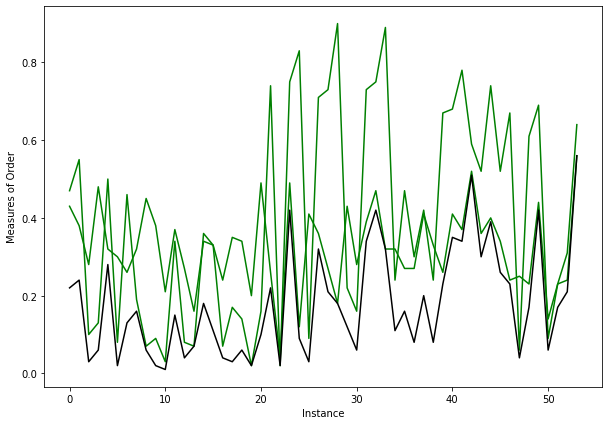

In [42]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches([10, 7])
ax.plot(merge_normalized["instance"], merge_normalized["first_correct_percentage_normalized-NN1"], color = "green", label = "Second Correct")

ax.plot(merge_normalized["instance"], merge_normalized["second_correct_percentage_normalized-NN1"], color = "green", label = "Second Correct")

ax.plot(merge_normalized["instance"], merge_normalized["all_correct_percentage_normalized-NN1"], color = "black",label= "All Correct")  

ax.set_xlabel("Instance")
ax.set_ylabel("Measures of Order")

# MEASURES (FIRST, SECOND& ALL) OF ORDER (TIME)

Text(0, 0.5, 'Measures of Order')

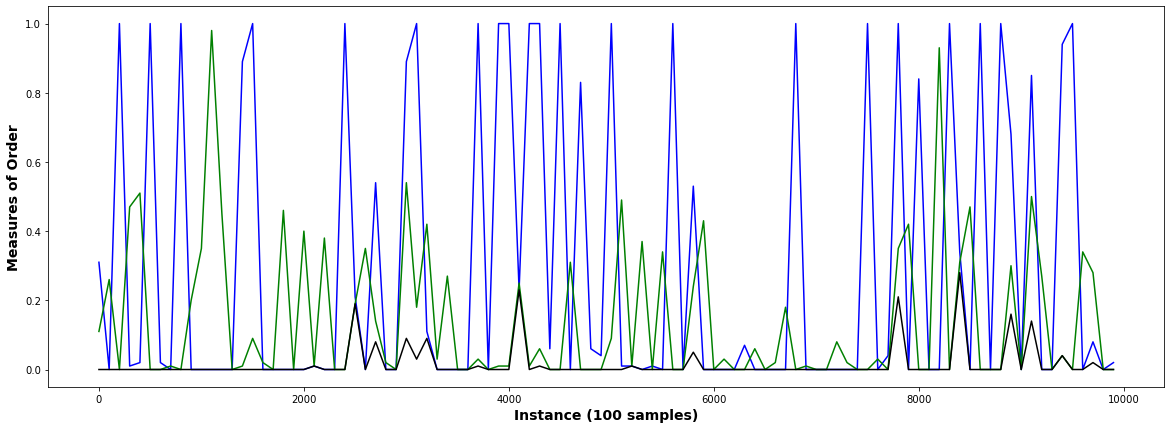

In [43]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches([20, 7])

instances_100 = []
first_correct_percentage_normalized_100_time_NN1 = []
second_correct_percentage_normalized_100_time_NN1 = []
all_correct_percentage_normalized_100_time_NN1 = []

for x in Time_strat_100:
    instances_100.append(Time_NN1_normalized["instance"][x])
    first_correct_percentage_normalized_100_time_NN1.append(Time_NN1_normalized["first_correct_percentage_normalized"][x])
    second_correct_percentage_normalized_100_time_NN1.append(Time_NN1_normalized["second_correct_percentage_normalized"][x])
    all_correct_percentage_normalized_100_time_NN1.append(Time_NN1_normalized["all_correct_percentage_normalized"][x])

ax.plot(instances_100, first_correct_percentage_normalized_100_time_NN1, color = "blue",label= "First Correct")
ax.plot(instances_100, second_correct_percentage_normalized_100_time_NN1, color = "green",label= "Second Correct")
ax.plot(instances_100, all_correct_percentage_normalized_100_time_NN1, color = "black",label= "All Correct")

ax.set_xlabel("Instance (100 samples)", fontsize=14, fontweight='bold')
ax.set_ylabel("Measures of Order", fontsize=14, fontweight='bold')

# MEASURES OF ORDER (LOAN 5 - NN1)

# MEASURES FIRST, SECOND, AND ALL FOR LOAN  (5) NN1

In [44]:
# fig,ax = plt.subplots(1,1)
# fig.set_size_inches([10, 7])
# #ax.plot(merge_normalized["instance"], Loan5_NN1_normalized["first_correct_percentage_normalized"], color = "green", label = "Second Correct")

# ax.plot(merge_normalized["instance"], Loan5_NN1_normalized["second_correct_percentage_normalized"], color = "green", label = "Second Correct")

# ax.plot(merge_normalized["instance"], Loan5_NN1_normalized["all_correct_percentage_normalized"], color = "black",label= "All Correct")  

# ax.set_xlabel("Instance")
# ax.set_ylabel("Measures of Order")

In [45]:
# MEASURES FIRST, SECOND, AND ALL FOR LOAN (25) NN1

In [46]:
# fig,ax = plt.subplots(1,1)
# fig.set_size_inches([10, 7])
# ax.plot(merge_normalized["instance"], merge_normalized["second_correct_percentage_normalized-NN1"], color = "green", label = "Second Correct")

# ax.plot(merge_normalized["instance"],merge_normalized["all_correct_percentage_normalized-NN1"], color = "black",label= "All Correct")  

# ax.set_xlabel("Instance")
# ax.set_ylabel("Measures of Order")

In [47]:
# MEASURES FIRST, SECOND, AND ALL FOR LOAN (50) NN1

In [48]:
# fig,ax = plt.subplots(1,1)
# fig.set_size_inches([10, 7])
# ax.plot(merge_normalized["instance"], Loan50_NN1_normalized["second_correct_percentage_normalized"], color = "green", label = "Second Correct")

# ax.plot(merge_normalized["instance"], Loan50_NN1_normalized["all_correct_percentage_normalized"], color = "black",label= "All Correct")  

# ax.set_xlabel("Instance")
# ax.set_ylabel("Measures of Order")

In [49]:
# MEASURES FIRST, SECOND, AND ALL FOR (TIME - NN1)

In [50]:
# fig,ax = plt.subplots(1,1)
# fig.set_size_inches([20, 7])

# instances_100 = []
# second_correct_percentage_normalized_100_time_NN1 = []
# all_correct_percentage_normalized_100_time_NN1 = []

# for x in Time_strat_100:
#     instances_100.append(Time_NN1_normalized["instance"][x])
#     second_correct_percentage_normalized_100_time_NN1.append(Time_NN1_normalized["second_correct_percentage_normalized"][x])
#     all_correct_percentage_normalized_100_time_NN1.append(Time_NN1_normalized["all_correct_percentage_normalized"][x])
    
# ax.plot(instances_100, second_correct_percentage_normalized_100_time_NN1, color = "green",label= "Second Correct")
# ax.plot(instances_100, all_correct_percentage_normalized_100_time_NN1, color = "black",label= "All Correct")

# ax.set_xlabel("Instance (100 samples)", fontsize=14, fontweight='bold')
# ax.set_ylabel("Measures of Order", fontsize=14, fontweight='bold')

In [51]:
# MEASURES FIRST, SECOND, AND ALL FOR DISTANCE NN1  (note that distance was only ran for 50 runs)

In [52]:
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##   FROM HERE WE USE C OF ED (ED COMPLEMENT) AND SECOND CORRECT AND ALL CORRECT
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# EUCLIDEAN COMPLEMENT vs SECOND CORRECT MEASURE OF ORDER (LOAN 5 NN1)

In [53]:
# fig,ax = plt.subplots(1,1)
# fig.set_size_inches([10, 7])
# ax.plot(merge_normalized["instance"], Loan5_NN1_normalized["distance_mean_diff"], color = "red", label = "Euclidean Complement")

# ax.plot(merge_normalized["instance"], Loan5_NN1_normalized["second_correct_percentage_normalized"], color = "green", label= "Second Correct")  

# ax.set_xlabel("Instance")
# ax.set_ylabel("EC vs SC")

# EUCLIDEAN COMPLEMENT vs SECOND CORRECT MEASURE OF ORDER (LOAN 25 NN1)

In [54]:
# fig,ax = plt.subplots(1,1)
# fig.set_size_inches([10, 7])
# ax.plot(merge_normalized["instance"], merge_normalized["distance_mean_diff-NN1"], color = "red", label = "Euclidean Complement")

# ax.plot(merge_normalized["instance"], merge_normalized["second_correct_percentage_normalized-NN1"], color = "green", label= "Second Correct")  

# ax.set_xlabel("Instance")
# ax.set_ylabel("EC vs SC")

# EUCLIDEAN COMPLEMENT vs SECOND CORRECT MEASURE OF ORDER (LOAN 50 NN1)

In [55]:
# fig,ax = plt.subplots(1,1)
# fig.set_size_inches([10, 7])
# ax.plot(merge_normalized["instance"], Loan50_NN1_normalized["distance_mean_diff"], color = "red", label = "Euclidean Complement")

# ax.plot(merge_normalized["instance"], Loan50_NN1_normalized["second_correct_percentage_normalized"], color = "green", label= "Second Correct")  

# ax.set_xlabel("Instance")
# ax.set_ylabel("EC vs SC")

# EUCLIDEAN COMPLEMENT vs ALL CORRECT MEASURE OF ORDER (LOAN 5 NN1)

In [56]:
# fig,ax = plt.subplots(1,1)
# fig.set_size_inches([10, 7])
# ax.plot(merge_normalized["instance"], Loan5_NN1_normalized["distance_mean_diff"], color = "red", label = "Euclidean Complement")
# ax.plot(merge_normalized["instance"], Loan5_NN1_normalized["all_correct_percentage_normalized"], color = "black", label= "Second Correct")  

# ax.set_xlabel("Instance")
# ax.set_ylabel("EC vs AC")

# EUCLIDEAN COMPLEMENT vs ALL CORRECT MEASURE OF ORDER (LOAN 25 NN1)

In [57]:
# fig,ax = plt.subplots(1,1)
# fig.set_size_inches([10, 7])
# ax.plot(merge_normalized["instance"], merge_normalized["distance_mean_diff-NN1"], color = "red", label = "Euclidean Complement")

# ax.plot(merge_normalized["instance"], merge_normalized["all_correct_percentage_normalized-NN1"], color = "black", label= "All Correct")  

# ax.set_xlabel("Instance")
# ax.set_ylabel("EC vs AC")

# EUCLIDEAN COMPLEMENT vs ALL CORRECT MEASURE OF ORDER (LOAN 50 NN1)

In [58]:
# fig,ax = plt.subplots(1,1)
# fig.set_size_inches([10, 7])
# ax.plot(merge_normalized["instance"], Loan50_NN1_normalized["distance_mean_diff"], color = "red", label = "Euclidean Complement")

# ax.plot(merge_normalized["instance"], Loan50_NN1_normalized["all_correct_percentage_normalized"], color = "black", label= "All Correct")  

# ax.set_xlabel("Instance")
# ax.set_ylabel("EC vs AC")

# EUCLIDEAN COMPLEMENT (LOAN 5-25-50 NN1)

In [59]:
# fig,ax = plt.subplots(1,1)
# fig.set_size_inches([10, 7])

# ax.plot(merge_normalized["instance"], Loan5_NN1_normalized["distance_mean_diff"], color = "pink", label = "Euclidean Complement")
# ax.plot(merge_normalized["instance"], merge_normalized["distance_mean_diff-NN1"], color = "red", label = "Euclidean Complement")
# ax.plot(merge_normalized["instance"], Loan50_NN1_normalized["distance_mean_diff"], color = "burgundy", label = "Euclidean Complement")

# ax.set_xlabel("Instance")
# ax.set_ylabel("EC")

# SECOND CORRECT MEASURE OF ORDER (LOAN 5-25-50 NN1)

In [60]:
# fig,ax = plt.subplots(1,1)
# fig.set_size_inches([10, 7])

# ax.plot(merge_normalized["instance"], Loan5_NN1_normalized["second_correct_percentage_normalized"], color = "red", label = "Second Correct")
# ax.plot(merge_normalized["instance"], merge_normalized["second_correct_percentage_normalized-NN1"], color = "orange", label = "Second Correct")
# ax.plot(merge_normalized["instance"], Loan50_NN1_normalized["second_correct_percentage_normalized"], color = "purple", label = "Second Correct")

# ax.set_xlabel("Instance")
# ax.set_ylabel("SC")

# ALL CORRECT MEASURE OF ORDER (LOAN 5-25-50 NN1)

In [61]:
# fig,ax = plt.subplots(1,1)
# fig.set_size_inches([10, 7])

# ax.plot(merge_normalized["instance"], Loan5_NN1_normalized["all_correct_percentage_normalized"], color = "red", label = "All Correct")
# ax.plot(merge_normalized["instance"], merge_normalized["all_correct_percentage_normalized-NN1"], color = "orange", label = "All Correct")
# ax.plot(merge_normalized["instance"], Loan50_NN1_normalized["all_correct_percentage_normalized"], color = "purple", label = "All Correct")

# ax.set_xlabel("Instance")
# ax.set_ylabel("AC")

# ED COMPLEMENT vs MEASURES OF ORDER (LOAN 5 NN1)

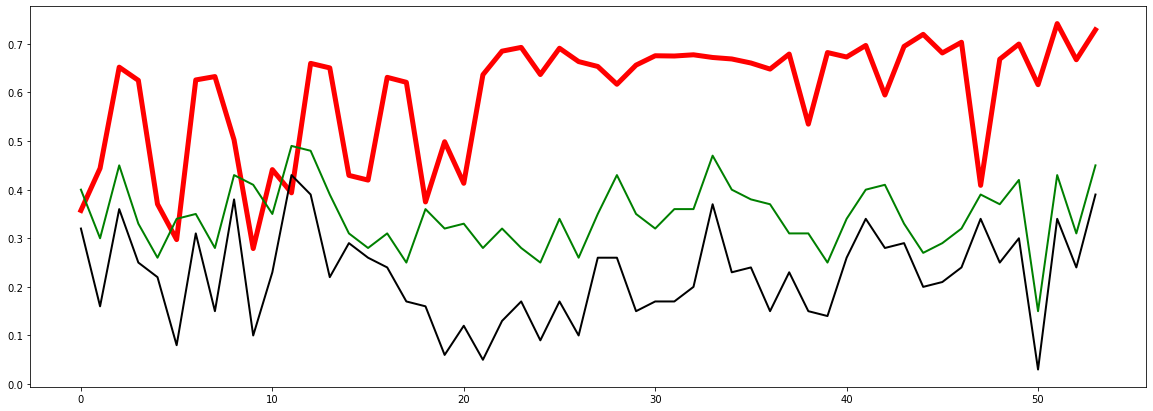

In [62]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches([20, 7])
ax.plot(merge_normalized["instance"], Loan5_NN1_normalized["distance_mean_diff"], color = "red", label= "Euclidean Distance", linewidth=5)
ax.plot(merge_normalized["instance"], Loan5_NN1_normalized["second_correct_percentage_normalized"], color = "green",label= "Second Correct", linewidth=2)
ax.plot(merge_normalized["instance"], Loan5_NN1_normalized["all_correct_percentage_normalized"], color = "black", label= "All Correct", linewidth=2)

# ED COMPLEMENT vs MEASURES OF ORDER (LOAN 25 NN1)

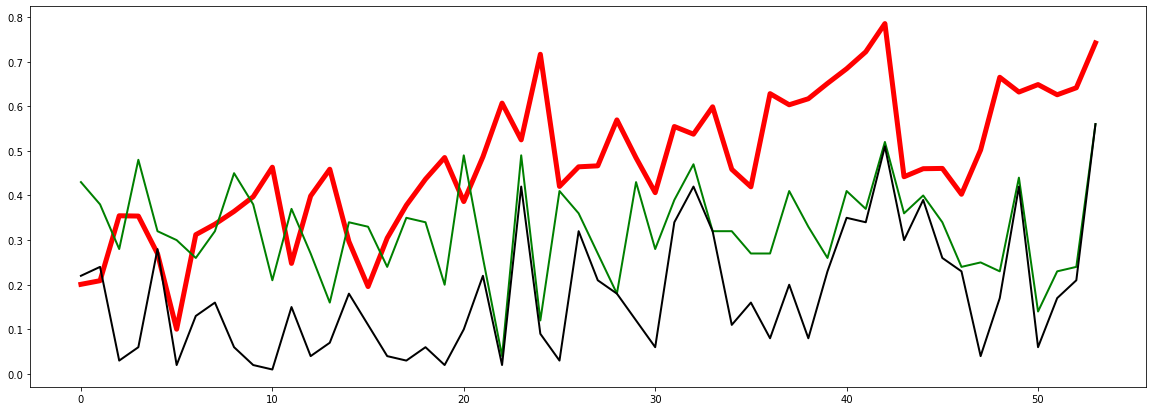

In [63]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches([20, 7])
ax.plot(merge_normalized["instance"], merge_normalized["distance_mean_diff-NN1"], color = "red", label= "Euclidean Distance", linewidth=5)
ax.plot(merge_normalized["instance"], merge_normalized["second_correct_percentage_normalized-NN1"], color = "green",label= "Second Correct", linewidth=2)
ax.plot(merge_normalized["instance"], merge_normalized["all_correct_percentage_normalized-NN1"], color = "black", label= "All Correct", linewidth=2)

# ED COMPLEMENT vs MEASURES OF ORDER (LOAN 50 NN1)

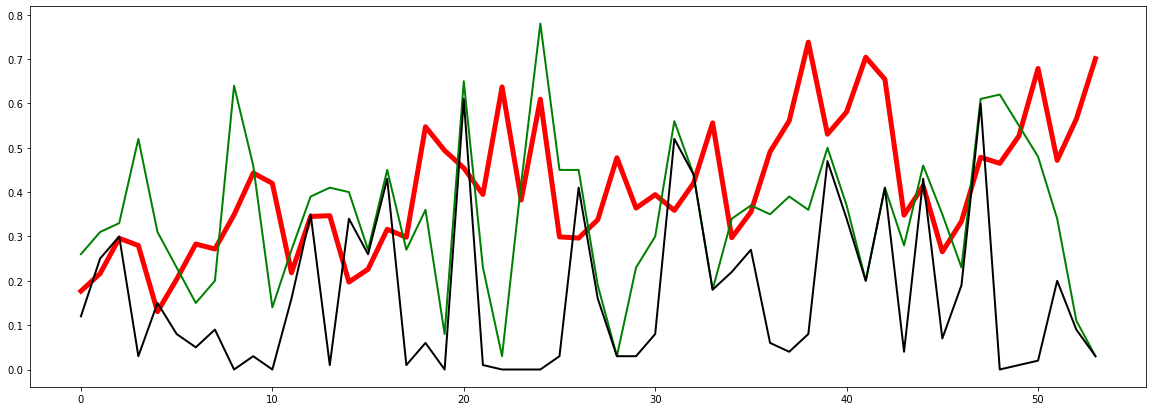

In [64]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches([20, 7])
ax.plot(Loan_NN1["instance"], Loan50_NN1_normalized["distance_mean_diff"], color = "red", label= "Euclidean Distance", linewidth=5)
ax.plot(Loan_NN1["instance"], Loan50_NN1_normalized["second_correct_percentage_normalized"], color = "green",label= "Second Correct", linewidth=2)
ax.plot(Loan_NN1["instance"], Loan50_NN1_normalized["all_correct_percentage_normalized"], color = "black", label= "All Correct", linewidth=2)

# ED COMPLEMENT vs MEASURES OF ORDER (TIME)

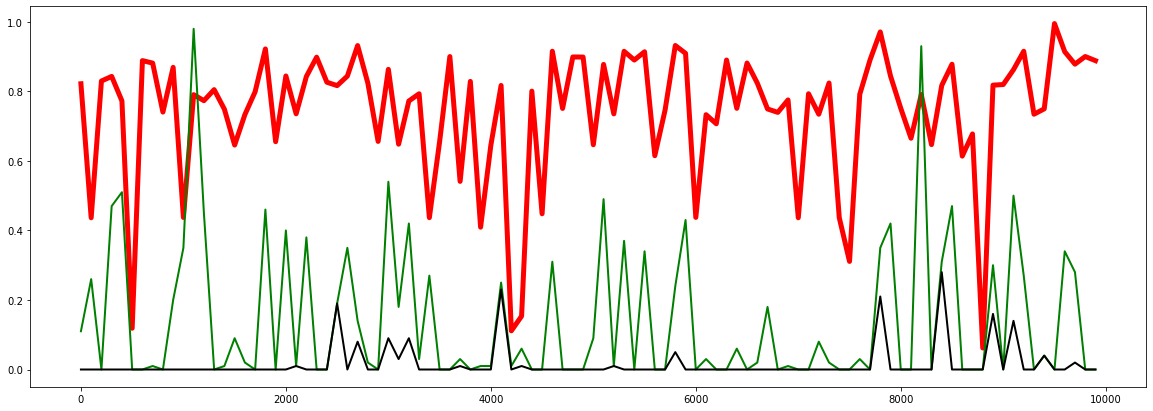

In [68]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches([20, 7])

instances_100 = []
distance_mean_normalized_100_time_NN1 = []
second_correct_percentage_normalized_100_time_NN1 = []
all_correct_percentage_normalized_100_time_NN1 = []

for x in Time_strat_100:
    instances_100.append(Time_NN1_normalized["instance"][x])
    distance_mean_normalized_100_time_NN1.append(Time_NN1_normalized["distance_mean_diff"][x])
    second_correct_percentage_normalized_100_time_NN1.append(Time_NN1_normalized["second_correct_percentage_normalized"][x])
    all_correct_percentage_normalized_100_time_NN1.append(Time_NN1_normalized["all_correct_percentage_normalized"][x])
    
ax.plot(instances_100, distance_mean_normalized_100_time_NN1, linewidth=5,color = "red", label= "Euclidean Distance")
ax.plot(instances_100, second_correct_percentage_normalized_100_time_NN1, linewidth=2, color = "green",label= "Second Correct")
ax.plot(instances_100, all_correct_percentage_normalized_100_time_NN1, linewidth=2, color = "black",label= "All Correct")
